In [2]:
import time
import math

In [3]:
def spec(M,d):
    l = []
    
    if d == 1:
        return [M]
    else:
        a0list = []
        for a0 in range(1, int(M/2) +1):
            if M % a0 == 0:
                a0list.append(a0)
        new = []
        for a0 in a0list:
            
            slist = spec(int(M/a0)-1, d-1)
            if d ==2:
                new = new + [[a0] + slist]
            else:
                for s in slist:
                    new.append([a0] + s)
      
        return new
            

In [4]:
spec(10,3)

[[1, 1, 8], [1, 3, 2], [2, 1, 3], [2, 2, 1]]

In [5]:
def summer(P):
    if len(P) == 1:
        return P[0]
    else:
        x = P[0]
        return x + x*summer(P[1:])

def prod(l):
    #return product of a list
    p = 1
    for i in l:
        p = p*i
    return p

In [6]:
t0 = time.time()
spec(300,4)
t1 = time.time()
print("Recursive version took {} seconds.".format(t1-t0))

Recursive version took 0.0007131099700927734 seconds.


In [7]:
spec(8,2)

[[1, 7], [2, 3], [4, 1]]

In [8]:
def make_tree_dict(P):
    #return a dictionary representing the tree structure of P
    
    #summer(P) is runs the depth equation on P.
    M = summer(P)
    
    #This loop creates an empty dictionary with M items
    d = {}
    for i in range(0,M):
        d[i] = []
        
    if len(P) == 1:
        return d
    
    #The current node to assign children to, and the starting
    #index for children.
    current = 0    
    nextnode = P[0]
    
    #Set the starting level and pernode
    level = 1
    pernode = P[level]
    
    #The maximum number of nodes in the first tier
    levelmax = P[0]
    
    #block for entire list
    todo = M - prod(P) 
    while current < todo :
        inlevel = 0
        pernode = P[level]
        
        #block for each tier
        while inlevel < levelmax  and current < todo:
                    
            #This block account for the children of a specific node
            count = 0
            while count < pernode :
                d[current] += [nextnode]
                nextnode += 1
                count += 1
            current += 1
            inlevel += 1
        
        #Once a tier is finished, move on to next, update levelmax appropriately
        # for the next tier
        level += 1        
        levelmax = inlevel * pernode        
            
    return d

In [9]:
make_tree_dict([2])
#should be {0:[], 1:[]}

{0: [], 1: []}

In [10]:
make_tree_dict([2,1])
#Should be {0:[2], 1:[3], 2:[], 3:[]}

{0: [2], 1: [3], 2: [], 3: []}

In [11]:
make_tree_dict([2,1,2])
# should be = {0:[2], 1:[3], 2:[4,5],  3:[6,7], 4:[],5:[],6:[], 7:[]}

{0: [2], 1: [3], 2: [4, 5], 3: [6, 7], 4: [], 5: [], 6: [], 7: []}

In [12]:
make_tree_dict([1,2,3])
#Should be  {0:[1,2], 1:[3,4,5], 2:[6,7,8]}

{0: [1, 2],
 1: [3, 4, 5],
 2: [6, 7, 8],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: []}

In [13]:
make_tree_dict([2,3])
#should be {0:[2,3,4], 1:[5,6,7]}

{0: [2, 3, 4], 1: [5, 6, 7], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}

In [14]:
def make_tree(P):
    d = make_tree_dict(P)
    return DiGraph(d)

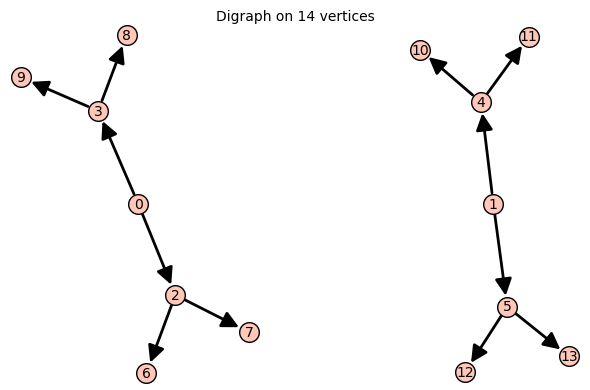

In [15]:
make_tree([2,2,2])

In [16]:
def genIdeal(x, D):
    #given element x and tree D, return ideal generated by x in D as a set
    if D.neighbors_out(x) == []:
        return set([x])
    else:
        s = set([x])
        for i in D.neighbors_out(x):
            s = s.union(genIdeal(i,D))
        return s

In [17]:
genIdeal(3, make_tree([2,3,1]))

{3, 9}

In [18]:
def all_inNeighbors(x,D):
    #return the set of all vertices greater than or equal to x in graph D
    s = set([x])
    if D.neighbors_in(x) == []:
        return s
    else:
        s = s.union(D.neighbors_in(x))
        for y in D.neighbors_in(x):
            s = s.union(all_inNeighbors(y,D))
        return s        

In [19]:
all_inNeighbors(6, make_tree([2,1,2]))

{1, 3, 6}

In [20]:
def find_ideals(D, t):
    #given tree D and strength t, find all ideals of strength t in D
    result = []
    
    if D.vertices == []:
        return [result]
    if t == 0:
        return [result]
    
    for x in D.vertices():
        ideal = genIdeal(x,D)
        if len(ideal) == t:
            result += [genIdeal(x,D)]
        else:
            newstrength = t - len(ideal)
            if newstrength >= 0:
                tempD = D.copy()
                tempD.delete_vertices(list(all_inNeighbors(x,D)))
                smallerideals = find_ideals(tempD, newstrength)
                for I in smallerideals:
                    check = ideal.union(I)
                    if len(check) == t and check not in result:
                        result += [check]
            else:
                pass
    return result

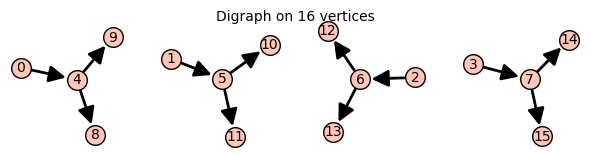

In [21]:
make_tree([4,1,2])

In [22]:
find_ideals(make_tree([2,1,2]), 2)

[{4, 5}, {4, 6}, {4, 7}, {5, 6}, {5, 7}, {6, 7}]

In [23]:
def find_anti_ideals(D, t):
    #return a list of all anti-ideals of strength t in D
    result = []
    s = len(D.vertices())
    verts = set(D.vertices())
    ideals = find_ideals(D, s-t)
    for I in ideals:
        test = verts.difference(set(I))
        if test in result:
            pass
        else:
            result += [test]
    return result
        

In [24]:
find_anti_ideals(make_tree([2,1,2]), 2)

[{1, 3}, {0, 2}, {0, 1}]

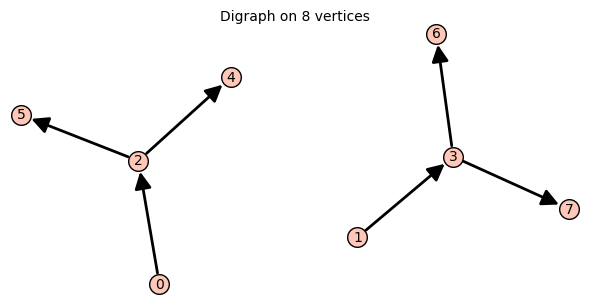

In [25]:
make_tree([2,1,2])

In [26]:
def reverseideals(D,t):
    # Compute anti-ideals by computing ideals in reversed graph
    Dt = D.reverse()
    return find_ideals(Dt, t)

In [27]:
reverseideals(make_tree([2,1,2]), 2)

[{0, 1}, {0, 2}, {1, 3}]

In [28]:
find_ideals(make_tree([2,1,2]), 2)

[{4, 5}, {4, 6}, {4, 7}, {5, 6}, {5, 7}, {6, 7}]

In [29]:
def assignWeights(D):
    #assign a weight to each node accoring to the size of its ideal, return in dict
    d = {}
    for i in D.vertices():
        d[i] = len(genIdeal(i,D))
    return d

In [30]:
assignWeights(make_tree([2,1,2]))

{0: 4, 1: 4, 2: 3, 3: 3, 4: 1, 5: 1, 6: 1, 7: 1}

In [31]:
def idealList(D):
    #returns dictionaries with ideals and wieghts of each node in D
    result = {}
    weights = {}
    for x in D.vertices():
        result[x] = genIdeal(x,D)
        weights[x] = len(genIdeal(x,D))
    return [result,weights]

In [32]:
idealList(make_tree([2,1,2]))

[{0: {0, 2, 4, 5},
  1: {1, 3, 6, 7},
  2: {2, 4, 5},
  3: {3, 6, 7},
  4: {4},
  5: {5},
  6: {6},
  7: {7}},
 {0: 4, 1: 4, 2: 3, 3: 3, 4: 1, 5: 1, 6: 1, 7: 1}]

In [33]:
def compatibleIdeals(D,ideals, X, y):
    #check if y in ideals or any element of X in ideal generated by y
    idealsGenBySet = set()
    for x in X:
        idealsGenBySet = idealsGenBySet.union(ideals[x])
    if y in idealsGenBySet:
        return False
    elif ideals[y].intersection(X) != set():
        return False
    else:
        return True

def findSums(D,t, ideals, weights, X):
    #return sums of sizes of ideals including  list X with value t    
    
    sums = []
    if t == 0:
        return []
    
    idealsGenBySet = set()
    setWeight = 0    
    for x in X:
        idealsGenBySet = idealsGenBySet.union(ideals[x])
        setWeight += len(ideals[x])    
    
    for y in D.vertices():
        if not compatibleIdeals(D,ideals, X, y):
            pass
        elif setWeight + weights[y] == t:
            if idealsGenBySet.union(ideals[y]) in sums:
                pass
            else:
                sums += [idealsGenBySet.union(ideals[y])]
        elif setWeight + weights[y] < t:
            for x in findSums(D,t, ideals, weights, X + [y]):
                if x in sums:
                    pass
                else:
                    sums += [x]            
        else:
            pass
    return sums
            

In [34]:
def allIdeals(D,t, ideals, weights):
    #return ideals of size t in D
    result = []
    
    if D.vertices() == []:
        return [result]
    if t == 0:
        return [result]
    
    for x in D.vertices():
        if weights[x] == t:
            result += [ideals[x]]
        elif weights[x] > t:
            pass
        else:
            sums = findSums(D,t, ideals, weights, [x])
            for s in sums:
                if s in result:
                    pass
                else:
                    result += [s]               
    return result
            
def antiideals_withdicts(D,t):
    # Compute anti-ideals by computing ideals in reversed graph
    Dt = D.reverse()
    l = idealList(Dt)
    ideals = l[0]
    weights = l[1]
    return allIdeals(Dt, t,ideals, weights)

In [35]:
l = idealList(make_tree([2,1,2]))
ideals = l[0]
weights = l[1]

In [38]:
P = [2,1,2,2]
t0 = time.time()
l = idealList(make_tree(P))
ideals = l[0]
weights = l[1]
x = allIdeals(make_tree(P),12,ideals,weights)
print(len(x))
t1 = time.time()
print("Big space version took {} seconds.".format(t1-t0))


15
Big space version took 6.910770416259766 seconds.


In [ ]:
t0 = time.time()
find_ideals(make_tree([2,1,2,2]), 10)
t1 = time.time()
print("Lower space version took {} seconds.".format(t1-t0))


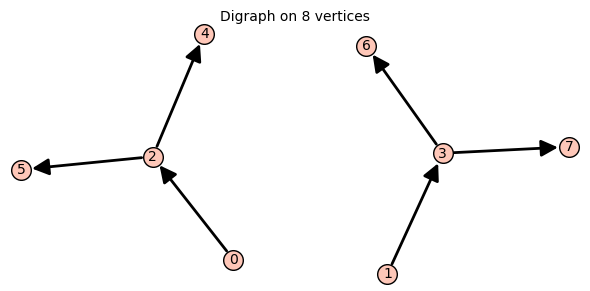

In [39]:
make_tree([2,1,2])

In [40]:
def allIdealsCheckedlist(D,t, ideals, weights):
    #return ideals of size t in D
    result = []
    
    tocheck = D.vertices().copy()
    
    if D.vertices() == []:
        return [result]
    if t == 0:
        return [result]
    
    while tocheck != []:
        x = tocheck.pop()
        D.delete_vertex(x)
        if weights[x] == t:
            result += [ideals[x]]
        elif weights[x] > t:
            pass
        else:
            sums = findSums(D,t, ideals, weights, [x])
            for s in sums:
                if s in result or len(s) != t:
                    pass
                else:
                    result += [s]               
    return result

In [49]:
P = [2,1,2,2,2]
t0 = time.time()
l = idealList(make_tree(P))
ideals = l[0]
weights = l[1]
x = allIdealsCheckedlist(make_tree(P),4,ideals,weights)
t1 = time.time()
print("Big space version with vertex deletion took {} seconds.".format(t1-t0))
print(len(x))

Big space version with vertex deletion took 0.2216331958770752 seconds.
1932


In [44]:
len(allIdeals(make_tree(P),8,ideals,weights))

71

In [48]:
summer(P)

8

In [49]:
def antiideals(D,t):
    #return a list of all anti-ideals of strength t in D
    result = []
    l = idealList(D)
    ideals = l[0]
    weights = l[1]
    s = len(D.vertices())
    verts = set(D.vertices())
    ideals = allIdealsCheckedlist(D, s-t, ideals, weights)
    for I in ideals:
        test = verts.difference(set(I))
        if test in result:
            pass
        else:
            result += [test]
    return result
        

In [48]:
P = [2,1,2,2,2]
D = make_tree(P)
l = idealList(make_tree(P))
ideals = l[0]
weights = l[1]
allIdealsCheckedlist(D,6, ideals, weights)

[{8, 16, 17, 18, 19, 31},
 {8, 16, 17, 18, 20, 31},
 {8, 16, 17, 18, 21, 31},
 {8, 16, 17, 18, 22, 31},
 {8, 16, 17, 18, 23, 31},
 {8, 16, 17, 18, 24, 31},
 {8, 16, 17, 18, 25, 31},
 {8, 16, 17, 18, 26, 31},
 {8, 16, 17, 18, 27, 31},
 {8, 16, 17, 18, 28, 31},
 {8, 16, 17, 18, 29, 31},
 {8, 16, 17, 18, 30, 31},
 {8, 16, 17, 19, 20, 31},
 {8, 16, 17, 19, 21, 31},
 {8, 16, 17, 19, 22, 31},
 {8, 16, 17, 19, 23, 31},
 {8, 16, 17, 19, 24, 31},
 {8, 16, 17, 19, 25, 31},
 {8, 16, 17, 19, 26, 31},
 {8, 16, 17, 19, 27, 31},
 {8, 16, 17, 19, 28, 31},
 {8, 16, 17, 19, 29, 31},
 {8, 16, 17, 19, 30, 31},
 {8, 16, 17, 20, 21, 31},
 {8, 16, 17, 20, 22, 31},
 {8, 16, 17, 20, 23, 31},
 {8, 16, 17, 20, 24, 31},
 {8, 16, 17, 20, 25, 31},
 {8, 16, 17, 20, 26, 31},
 {8, 16, 17, 20, 27, 31},
 {8, 16, 17, 20, 28, 31},
 {8, 16, 17, 20, 29, 31},
 {8, 16, 17, 20, 30, 31},
 {8, 16, 17, 21, 22, 31},
 {8, 16, 17, 21, 23, 31},
 {8, 16, 17, 21, 24, 31},
 {8, 16, 17, 21, 25, 31},
 {8, 16, 17, 21, 26, 31},
 {8, 16, 17,

In [56]:
len(find_anti_ideals(make_tree([2,2,1]), 2))

5

In [108]:
len(reverseideals(make_tree([2,2,1]),2))

5

In [60]:
def reverseidealschecked(D,t):
    # Compute anti-ideals by computing ideals in reversed graph
    Dt = D.reverse()
    l = idealList(Dt)
    ideals = l[0]
    weights = l[1]
    return allIdealsCheckedlist(Dt, t, ideals, weights)

In [61]:
len(reverseidealschecked(make_tree([2,2,1,2]),2))

5

In [58]:
summer([2,2,1,2])

18